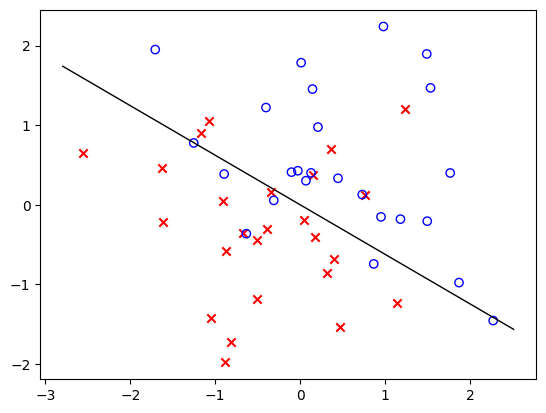

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)
    
    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                error = yi - prediction
                self.weights += self.learning_rate * error * xi
                self.bias += self.learning_rate * error

# 데이터 생성
np.random.seed(0)
num_samples = 50
X = np.random.randn(num_samples, 2)
y = np.where(np.sum(X, axis=1) > 0, 1, -1)

# 노이즈 추가
num_to_shuffle = 10
for i in range(num_to_shuffle):
    idx1, idx2 = np.random.choice(len(y), size=2, replace=False)
    # Swap the elements at the selected indices
    y[idx1], y[idx2] = y[idx2], y[idx1]

# 학습
perceptron = Perceptron(num_features=2, learning_rate=0.1, epochs=100)
perceptron.fit(X, y)

fig, ax = plt.subplots()

ax.scatter(X[y==-1][:,0], X[y==-1][:,1], color='red', marker='x')
ax.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', marker='o', facecolors='none')

# 결정경계
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_vals = np.array([x_min, x_max])
y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
ax.plot(x_vals, y_vals, color='black', linestyle='-', linewidth=1)

plt.show()